In [122]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from visualize import contour_with_quiver
from visualize import surf
from visualize import contour_with_path

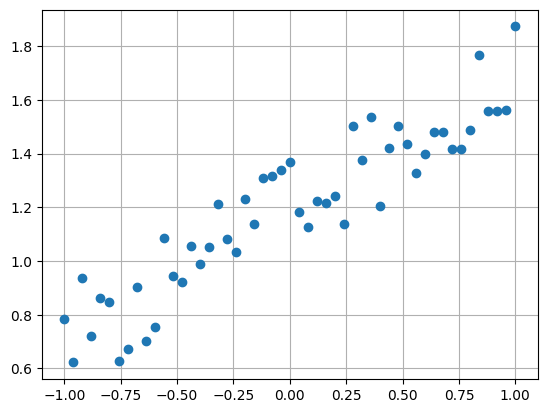

In [123]:
np.random.seed(320)
x_train = np.linspace(-1,1,51)
f = lambda x : 0.5*x + 1.0
y_train = f(x_train) + 0.4*np.random.rand(len(x_train))
plt.plot(x_train,y_train,'o')
plt.grid()
plt.show()

In [137]:
np.random.seed(303)
suffle_id = np.arange(0, len(x_train))
np.random.shuffle(suffle_id)
x_train = x_train[suffle_id]
y_train = y_train[suffle_id]

def loss(w, x_set, y_set):
    N = len(x_set)
    val = 0.0
    for i in range(len(x_set)):
        val += 0.5 * (w[0] * x_set[i] + w[1] - y_set[i]) ** 2
    return val / N

def loss_grad(w, x_set, y_set):
    N = len(x_set)
    val = np.zeros(len(w))
    for i in range(len(x_set)):
        er = w[0] * x_set[i] + w[1] - y_set[i]
        val += er * np.array([x_set[i], 1.0])
    return val / N

def generate_batches(batch_size, features, labels):
    """
    Create batches of features and labels
    :param batch_size: The batch size
    :param features: List of features
    :param labels: List of Labels
    :return: Batches of (Features, Labels)
    """

    assert len(features) == len(labels)
    output_batches = []  # corrected the typo here

    sample_size = len(features)
    for start_i in range(0, sample_size, batch_size):
        end_i = start_i + batch_size
        batch = [features[start_i:end_i], labels[start_i:end_i]]
        output_batches.append(batch)
    return output_batches

<h1>Gradient Descents</h1>

In [166]:
# SGD
batch_size = 10
lr = 0.01
MaxEpochs = 51
# Momentum
alpha = .9

In [167]:
w0 = np.array([4.0,-1.0])
path_sgd = []
for epoch in range(MaxEpochs):
    if epoch % 10 == 0:
        print(epoch, w0, loss(w0, x_train, y_train))
    for x_batch, y_batch in generate_batches(batch_size, x_train, y_train):
        path_sgd.append(w0)
        grad = loss_grad(w0,x_batch,y_batch)
        w1 = w0 - lr * grad
        w0 = w1

0 [ 4. -1.] 4.579314993864027
10 [3.04609499 0.20468237] 1.650076104762182
20 [2.38430802 0.80935736] 0.7182916108907212
30 [1.91167842 1.10190939] 0.37284179706753506
40 [1.56600011 1.23432286] 0.2168699552669081
50 [1.30840726 1.28636572] 0.13363142708237716


<h1>Momentum</h1>

In [168]:
w0 = np.array([4.0,-1.0])
path_mm = []
velocity = np.zeros_like(w0)
for epoch in range(MaxEpochs):
    if epoch % 10 == 0:
        print(epoch, w0, loss(w0, x_train, y_train))
        for x_batch, y_batch in generate_batches(batch_size, x_train, y_train):
            path_mm.append(w0)
            grad = loss_grad(w0,x_batch,y_batch)
            velocity = alpha * velocity - lr*grad
            w1 = w0 + velocity
            w0 = w1

0 [ 4. -1.] 4.579314993864027
10 [ 3.73631483 -0.57986964] 3.434482895271884
20 [3.11709503 0.26106661] 1.6601822576105119
30 [2.41981347 1.07137149] 0.6753937923290607
40 [1.80036971 1.61638494] 0.40369697009552696
50 [1.32116703 1.8469043 ] 0.3457022222416328


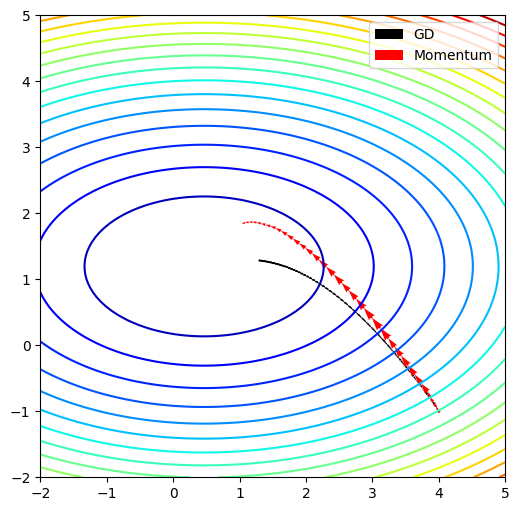

In [170]:
# batch = 10
# lr = 0.01로 설정하면 정상적인 그래프 나옴
w0 = np.linspace(-2,5,101)
w1 = np.linspace(-2,5,101)
w0, w1 = np.meshgrid(w0,w1)
lossw = w0*0
for i in range(w0.shape[0]):
    for j in range(w0.shape[1]):
        wij = np.array([w0[i,j],w1[i,j]])
        lossw[i,j] = loss(wij, x_train, y_train)
fig, ax = plt.subplots(figsize = (6,6))
ax.contour(w0,w1,lossw,cmap = plt.cm.jet,levels=np.linspace(0, max(lossw.flatten()), 20))
paths = path_sgd
paths = np.array(np.matrix(paths).T)
ax.quiver(paths[0,:-1], paths[1,:-1], paths[0, 1:] - paths[0,:-1], paths[1,1:]-paths[1,:-1],scale_units='xy',angles='xy', scale = 1, color = 'k')

paths = path_mm
paths = np.array(np.matrix(paths).T)
ax.quiver(paths[0,:-1], paths[1,:-1], paths[0, 1:] - paths[0,:-1], paths[1,1:]-paths[1,:-1],scale_units='xy',angles='xy', scale = 1, color = 'r')

plt.legend(["GD","Momentum"])
plt.show()

In [174]:
# SGD
batch_size = 5
lr = 1.5
MaxEpochs = 51
# Momentum
alpha = .9
# Adagrad
epsilon = lr
delta = 1e-7

<h1>Gradient Descents</h1>

In [175]:
w0 = np.array([4.0,-1.0])
path_sgd = []
for epoch in range(MaxEpochs):
    if epoch % 10 == 0:
        print(epoch, w0, loss(w0, x_train, y_train))
    for x_batch, y_batch in generate_batches(batch_size, x_train, y_train):
        path_sgd.append(w0)
        grad = loss_grad(w0,x_batch,y_batch)
        w1 = w0 - lr * grad
        w0 = w1

0 [ 4. -1.] 4.579314993864027
10 [0.2891338  1.21834492] 0.0124926263908453
20 [0.2891338  1.21834492] 0.01249262650252387
30 [0.2891338  1.21834492] 0.01249262650252387
40 [0.2891338  1.21834492] 0.01249262650252387
50 [0.2891338  1.21834492] 0.01249262650252387


<h1>Adagrad</h1>

In [176]:
w0 = np.array([4.0, -1.0])
r = np.zeros_like(w0)
path_adagrad = []

for epoch in range(MaxEpochs):
    if epoch % 10 == 0:
        print(epoch, w0, loss(w0, x_train, y_train))
        
    for x_batch, y_batch in generate_batches(batch_size, x_train, y_train):
        path_adagrad.append(w0)
        grad = loss_grad(w0, x_batch, y_batch)
        r = r + grad * grad
        delw = -epsilon/(delta+np.sqrt(r))*grad
        w1 = w0 + delw
        w0 = w1

0 [ 4. -1.] 4.579314993864027
10 [0.43228379 1.22167271] 0.0073020365224490446
20 [0.43274935 1.22159768] 0.007294474736103652
30 [0.43319788 1.22152184] 0.007287171826442392
40 [0.43363026 1.22144536] 0.007280114191835167
50 [0.43404731 1.22136839] 0.007273289140041769


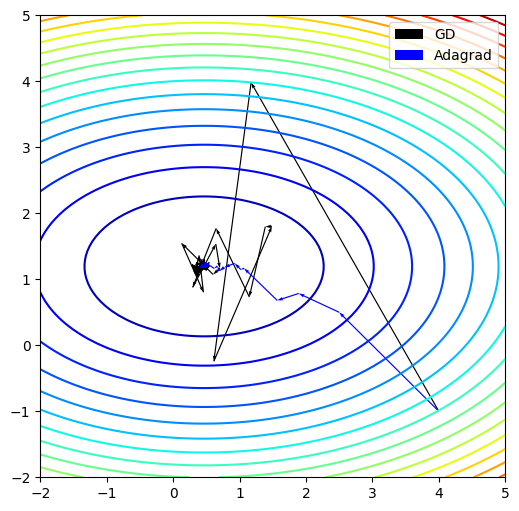

In [177]:
w0 = np.linspace(-2, 5, 101)
w1 = np.linspace(-2, 5, 101)
w0, w1 = np.meshgrid(w0, w1)
lossw = w0 * 0
for i in range(w0.shape[0]):
    for j in range(w0.shape[1]):
        wij = np.array([w0[i, j], w1[i, j]])
        lossw[i, j] = loss(wij, x_train, y_train)

fig, ax = plt.subplots(figsize=(6, 6))
contour = ax.contour(w0, w1, lossw, cmap=plt.cm.jet, levels=np.linspace(0, np.max(lossw), 20))

# Plot GD path
paths = path_sgd
paths = np.array(np.matrix(paths).T)
ax.quiver(paths[0, :-1], paths[1, :-1], paths[0, 1:] - paths[0, :-1], paths[1, 1:] - paths[1, :-1],
           scale_units='xy', angles='xy', scale=1, color='k', label='GD')

# # Plot MM path
# paths = path_mm
# paths = np.array(np.matrix(paths).T)
# ax.quiver(paths[0, :-1], paths[1, :-1], paths[0, 1:] - paths[0, :-1], paths[1, 1:] - paths[1, :-1],
#            scale_units='xy', angles='xy', scale=1, color='r', label='Momentum')

paths = path_adagrad
paths = np.array(np.matrix(paths).T)
ax.quiver(paths[0, :-1], paths[1, :-1], paths[0, 1:] - paths[0, :-1], paths[1, 1:] - paths[1, :-1],
           scale_units='xy', angles='xy', scale=1, color='b', label='Adagrad')

# Add legend
ax.legend()

plt.show()

In [190]:
batch_size = 10
MaxEpochs = 51

# Adagrad
epsilon = 0.25
delta = 1e-6

#RMSprop
rho = 0.9

<h1>Adagrad</h1>

In [191]:
w0 = np.array([4.0, -1.0])
r = np.zeros_like(w0)
path_adagrad = []

for epoch in range(MaxEpochs):
    if epoch % 10 == 0:
        print(epoch, w0, loss(w0, x_train, y_train))
        
    for x_batch, y_batch in generate_batches(batch_size, x_train, y_train):
        path_adagrad.append(w0)
        grad = loss_grad(w0, x_batch, y_batch)
        r = r + grad * grad
        delw = -epsilon/(delta+np.sqrt(r))*grad
        w1 = w0 + delw
        w0 = w1

0 [ 4. -1.] 4.579314993864027
10 [1.65931318 1.07861193] 0.25992944750953045
20 [1.08064837 1.2657423 ] 0.07451522738502923
30 [0.79617828 1.26957297] 0.028302777835327066
40 [0.64350631 1.24807069] 0.013547320941724016
50 [0.5588881  1.23005759] 0.00881632206217944


<h1>RMSprop</h1>

In [192]:
w0 = np.array([4.0, -1.0])
r = np.zeros_like(w0)
path_rmsprop = []

for epoch in range(MaxEpochs):
    if epoch % 10 == 0:
        print(epoch, w0, loss(w0, x_train, y_train))
        
    for x_batch, y_batch in generate_batches(batch_size, x_train, y_train):
        path_rmsprop.append(w0)
        grad = loss_grad(w0, x_batch, y_batch)
        r = rho * r + (1.-rho)*grad*grad
        delv = -epsilon*grad/np.sqrt(delta+r)
        w1 = w0 + delv
        w0 = w1

0 [ 4. -1.] 4.579314993864027
10 [0.21839145 1.33164857] 0.02678652776561964
20 [1.11853878 1.08945376] 0.08589103615876831
30 [0.35369894 1.17915222] 0.009087235334052616
40 [0.39733797 1.26534671] 0.010053058019862796
50 [0.32188259 1.19689874] 0.010388552288102976


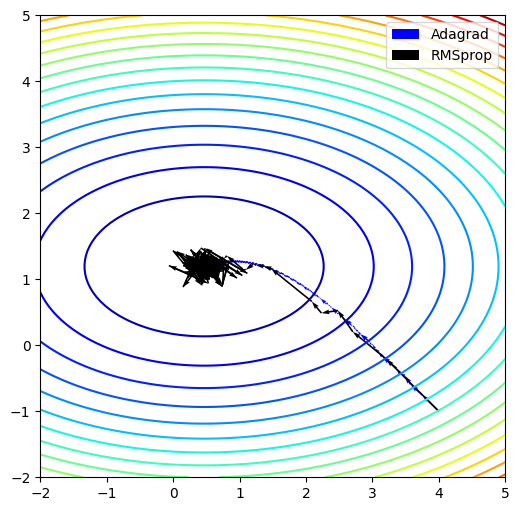

In [193]:
w0 = np.linspace(-2, 5, 101)
w1 = np.linspace(-2, 5, 101)
w0, w1 = np.meshgrid(w0, w1)
lossw = w0 * 0
for i in range(w0.shape[0]):
    for j in range(w0.shape[1]):
        wij = np.array([w0[i, j], w1[i, j]])
        lossw[i, j] = loss(wij, x_train, y_train)

fig, ax = plt.subplots(figsize=(6, 6))
contour = ax.contour(w0, w1, lossw, cmap=plt.cm.jet, levels=np.linspace(0, np.max(lossw), 20))

paths = path_adagrad
paths = np.array(np.matrix(paths).T)
ax.quiver(paths[0, :-1], paths[1, :-1], paths[0, 1:] - paths[0, :-1], paths[1, 1:] - paths[1, :-1],
           scale_units='xy', angles='xy', scale=1, color='b', label='Adagrad')

paths = path_rmsprop
paths = np.array(np.matrix(paths).T)
ax.quiver(paths[0, :-1], paths[1, :-1], paths[0, 1:] - paths[0, :-1], paths[1, 1:] - paths[1, :-1],
           scale_units='xy', angles='xy', scale=1, color='k', label='RMSprop')

# Add legend
ax.legend()

plt.show()

In [194]:
batch_size = 10
MaxEpochs = 51
epsilon = 0.1
delta = 1e-6

# Adam
delta_adam = 1e-8
rho1 = 0.9
rho2 = 0.999

#RMSprop
rho = 0.9

<h1>RMSprop</h1>

In [195]:
w0 = np.array([4.0, -1.0])
r = np.zeros_like(w0)
path_rmsprop = []

for epoch in range(MaxEpochs):
    if epoch % 10 == 0:
        print(epoch, w0, loss(w0, x_train, y_train))
        
    for x_batch, y_batch in generate_batches(batch_size, x_train, y_train):
        path_rmsprop.append(w0)
        grad = loss_grad(w0, x_batch, y_batch)
        r = rho * r + (1.-rho)*grad*grad
        delv = -epsilon*grad/np.sqrt(delta+r)
        w1 = w0 + delv
        w0 = w1

0 [ 4. -1.] 4.579314993864027
10 [0.47816783 1.24634591] 0.008077735327923096
20 [0.36443112 1.2516189 ] 0.010163633739765133
30 [0.44491408 1.2188961 ] 0.007107532150032367
40 [0.44211593 1.21974258] 0.007150888942595583
50 [0.44312251 1.21940946] 0.00713419772767439


<h1>Adam</h1>

In [198]:
w0 = np.array([4.0, -1.0])
s = np.zeros_like(w0)
r = np.zeros_like(w0)
path_adam = []
t = 0
for epoch in range(MaxEpochs):
    if epoch % 10 == 0:
        print(epoch, w0, loss(w0, x_train, y_train))
        
    for x_batch, y_batch in generate_batches(batch_size, x_train, y_train):
        path_adam.append(w0)
        grad = loss_grad(w0, x_batch, y_batch)
        s = rho1 * s + (1. - rho1)*grad
        r = rho2 * r + (1. - rho2)*grad*grad
        t += 1
        shat = s/(1-rho1 ** t)
        rhat = r/(1-rho2 ** t)
        delv = -epsilon*shat/(delta_adam + np.sqrt(rhat))
        w1 = w0 + delv
        w0 = w1

0 [ 4. -1.] 4.579314993864027
10 [0.68688052 1.41588005] 0.0395149099342917
20 [0.43522459 1.20239252] 0.00693960216850414
30 [0.45014723 1.2017939 ] 0.0068096626456450446
40 [0.44976766 1.20151364] 0.006810035586506148
50 [0.4498001  1.20156585] 0.006810184090047521


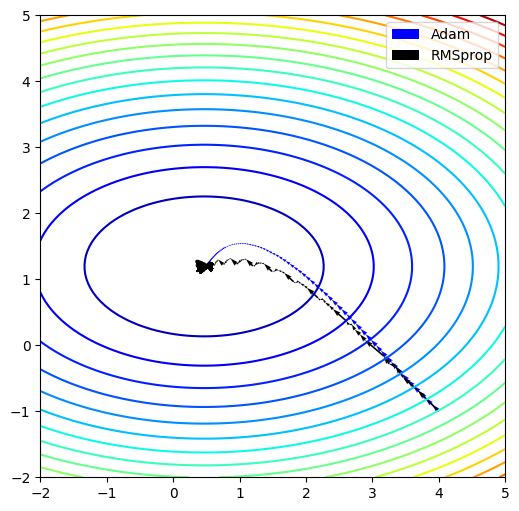

In [200]:
w0 = np.linspace(-2, 5, 101)
w1 = np.linspace(-2, 5, 101)
w0, w1 = np.meshgrid(w0, w1)
lossw = w0 * 0
for i in range(w0.shape[0]):
    for j in range(w0.shape[1]):
        wij = np.array([w0[i, j], w1[i, j]])
        lossw[i, j] = loss(wij, x_train, y_train)

fig, ax = plt.subplots(figsize=(6, 6))
contour = ax.contour(w0, w1, lossw, cmap=plt.cm.jet, levels=np.linspace(0, np.max(lossw), 20))

paths = path_adam
paths = np.array(np.matrix(paths).T)
ax.quiver(paths[0, :-1], paths[1, :-1], paths[0, 1:] - paths[0, :-1], paths[1, 1:] - paths[1, :-1],
           scale_units='xy', angles='xy', scale=1, color='b', label='Adam')

paths = path_rmsprop
paths = np.array(np.matrix(paths).T)
ax.quiver(paths[0, :-1], paths[1, :-1], paths[0, 1:] - paths[0, :-1], paths[1, 1:] - paths[1, :-1],
           scale_units='xy', angles='xy', scale=1, color='k', label='RMSprop')

# Add legend
ax.legend()

plt.show()